**Import Libraries**

In [1]:
import pandas as pd
from datetime import datetime
from pandas import DataFrame
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from matplotlib.collections import LineCollection

**Read the data**

In [3]:
data=pd.read_csv("Load_CSky.csv" )
data.head(3)

,DateTime,Load,Claer_sky_ii
0,1987-01-01 01:00:00,1733,2.87
1,1987-01-01 02:00:00,1636,2.87
2,1987-01-01 03:00:00,1564,2.87


In [4]:
data['DateTime'] = pd.to_datetime(data['DateTime'])

In [5]:
dataset=data.set_index(data['DateTime'], drop=False, append=False, inplace=False, verify_integrity=False).drop('DateTime', 1)
dataset.head(3)

<ipython-input-5-2a968e702324>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dataset=data.set_index(data['DateTime'], drop=False, append=False, inplace=False, verify_integrity=False).drop('DateTime', 1)


,Load,Claer_sky_ii
DateTime,,
1987-01-01 01:00:00,1733,2.87
1987-01-01 02:00:00,1636,2.87
1987-01-01 03:00:00,1564,2.87


In [6]:
series = pd.Series(dataset['Claer_sky_ii'], index=dataset.index)   #create a series
series

DateTime
1987-01-01 01:00:00    2.87
1987-01-01 02:00:00    2.87
1987-01-01 03:00:00    2.87
1987-01-01 04:00:00    2.87
1987-01-01 05:00:00    2.87
                       ... 
1990-01-31 20:00:00    3.89
1990-01-31 21:00:00    3.89
1990-01-31 22:00:00    3.89
1990-01-31 23:00:00    3.89
1990-01-31 00:00:00    3.89
Name: Claer_sky_ii, Length: 27048, dtype: float64

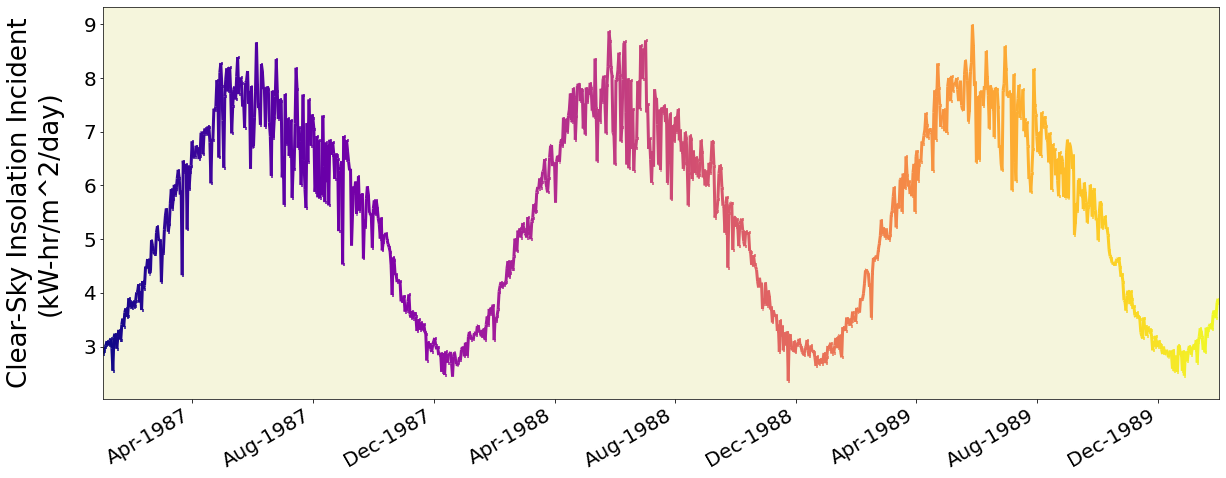

In [13]:
N, M = 20, 8  #Define the plot size
fig, ax = plt.subplots(1,figsize=(N, M))

#Convert dates to numbers
inxval = mdates.date2num(series.index.to_pydatetime())
points = np.array([inxval, series.values]).T.reshape(-1,1,2)
segments = np.concatenate([points[:-1],points[1:]], axis=1)

# The artisitic(:D) part 
# Line color
lc = LineCollection(segments, cmap='plasma', linewidth=3)
# Set color to date values
lc.set_array(inxval)
# Add collection to axes
ax.add_collection(lc)

# Change the background color
ax.set_facecolor("beige")

# X-Axis label
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
monthFmt = mdates.DateFormatter('%b-%Y')
ax.xaxis.set_major_formatter(monthFmt)

# Autoscale the view limits
ax.autoscale_view()

# Rotate xdate and right align them
plt.gcf().autofmt_xdate()

# Lighten borders 
ax.spines['bottom'].set_color('0.1')
ax.spines['top'].set_color('0.1')
ax.spines['right'].set_color('0.1')
ax.spines['left'].set_color('0.1')

# Set the font name for axis tick labels to be SimSun
for tick in ax.get_xticklabels():
    tick.set_fontname("SimSun")
for tick in ax.get_yticklabels():
    tick.set_fontname('SimSun')

plt.xlim(
    xmin=min(series.index) , 
    xmax=max(series.index) # The latest datetime in your dataset
)


plt.xticks(fontsize=20)
plt.yticks(fontsize=20, rotation=0)


# Change the y axis label to SimSun
ax.set_ylabel("Clear-Sky Insolation Incident\n(kW-hr/m^2/day)", fontname="SimSun", fontsize=26,labelpad = 20)


# Save the PNG 
plt.savefig("hourly Claer Sky Insolation Incident.png", format="png", dpi=300)